In [1]:
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import colorlover as cl
from IPython.display import HTML
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
from collections import Counter
from nltk.tokenize import word_tokenize
import operator
import nltk
from nrclex import NRCLex
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Import the data 
# Data downloaded from https://www.kaggle.com/datasets/michau96/australian-open-mens-finals-tweets, kept 1000 rows
df = pd.read_csv("AO_Final_2021_extracted.csv",sep=",", encoding='cp1252')

In [4]:
df

,date,user,tweet
0,2021-02-21 14:26,RightWing_Hack,Twitter might want to get used to the booing o...
1,2021-02-21 14:25,GeniusRaviraj,@DjokerNole #AustralianOpen #AusOpen #AusOpen...
2,2021-02-21 14:24,Yes_IamSancho,My #AusOpen review \r\n\r\nhttps://t.co/0U1jQs...
3,2021-02-21 14:24,DjokovicUk,@DjokerNole @AustralianOpen So happy Nole........
4,2021-02-21 14:24,Paisano,Disappointed in the next gen tennis stars who ...
...,...,...,...
996,2021-02-21 11:52,sportingnewsau,"""Out of 14 waking hours I spent 10 hours on th..."
997,2021-02-21 11:52,Tennis_Majors,"Medvedev : ""I think I went closer (from the To..."
998,2021-02-21 11:52,BenLewisSN590,Daniil Medvedev on the Big 3 dominance:\r\n\r\...
999,2021-02-21 11:52,HelenSManning,@DjokerNole Congratulations!! Nice to see you ...


In [5]:
# View the #travel information
AO_tag = df[df["tweet"].str.lower().str.contains("#ausopen", na=False)].copy()

In [6]:
AO_tag

,date,user,tweet
0,2021-02-21 14:26,RightWing_Hack,Twitter might want to get used to the booing o...
1,2021-02-21 14:25,GeniusRaviraj,@DjokerNole #AustralianOpen #AusOpen #AusOpen...
2,2021-02-21 14:24,Yes_IamSancho,My #AusOpen review \r\n\r\nhttps://t.co/0U1jQs...
3,2021-02-21 14:24,DjokovicUk,@DjokerNole @AustralianOpen So happy Nole........
4,2021-02-21 14:24,Paisano,Disappointed in the next gen tennis stars who ...
...,...,...,...
989,2021-02-21 11:52,Allegria_fiesta,No doubt <U+0001F642> \r\n\r\n #AusOpen
990,2021-02-21 11:52,AppoOfficial,The champion!<U+0001F4AA> Congratulations @Djo...
995,2021-02-21 11:52,toisports,#AusOpen #AO2021 #NovakDjokovic\r\n\r\nOn clou...
996,2021-02-21 11:52,sportingnewsau,"""Out of 14 waking hours I spent 10 hours on th..."


#Q1. Build a Mention Graph

(a) How many nodes and how many edges are in your mention graph?

In [7]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [8]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [9]:
# Add mentioend column 
addMentionedColumn(AO_tag)
# Create mention graph
AOGraph = mentionGraph(AO_tag)

In [10]:
print("# nodes:", len(AOGraph.nodes()))
print("# edges:", len(AOGraph.edges()))

# nodes: 314
# edges: 316


(b) Build a histogram of the graph nodes’ degree (i.e., the degree distribution of the graph).
What does the distribution in node degree tell you about how your network is structured?

In [11]:
AO_tag

,date,user,tweet,mentioned
0,2021-02-21 14:26,RightWing_Hack,Twitter might want to get used to the booing o...,[]
1,2021-02-21 14:25,GeniusRaviraj,@DjokerNole #AustralianOpen #AusOpen #AusOpen...,[djokernole]
2,2021-02-21 14:24,Yes_IamSancho,My #AusOpen review \r\n\r\nhttps://t.co/0U1jQs...,[]
3,2021-02-21 14:24,DjokovicUk,@DjokerNole @AustralianOpen So happy Nole........,"[djokernole, australianopen]"
4,2021-02-21 14:24,Paisano,Disappointed in the next gen tennis stars who ...,[]
...,...,...,...,...
989,2021-02-21 11:52,Allegria_fiesta,No doubt <U+0001F642> \r\n\r\n #AusOpen,[]
990,2021-02-21 11:52,AppoOfficial,The champion!<U+0001F4AA> Congratulations @Djo...,[djokernole<u+0001f3c6>]
995,2021-02-21 11:52,toisports,#AusOpen #AO2021 #NovakDjokovic\r\n\r\nOn clou...,"[djokernole's, australianopen]"
996,2021-02-21 11:52,sportingnewsau,"""Out of 14 waking hours I spent 10 hours on th...",[]


In [12]:
# Calculate the node degree
degree = dict(AOGraph.degree)
Node_derge = list(dict(nx.degree(AOGraph)).values())

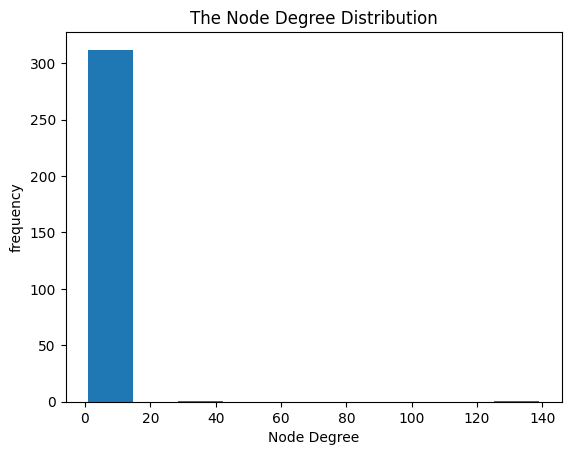

In [13]:
plt.hist(x = Node_derge)
plt.title("The Node Degree Distribution")
plt.xlabel ("Node Degree")
plt.ylabel("frequency")
plt.show()

According to the bar chart, there is a high occurrence rate when the node degree is low. It means that only a few users that are mentioned (@) by a large number of individuals.

(c) Build a log-log scatterplot with the node degree (x-axis) and fraction of nodes with that
degree (y-axis). Does your mention graph exhibit a power law trend? If not, can you explain
why that may be?

In [14]:
degrees = []
frac = []
for val in degree.values():
  if val not in degrees:
    frac.append((Counter(degree.values())[val] )/344)
    degrees.append(val)

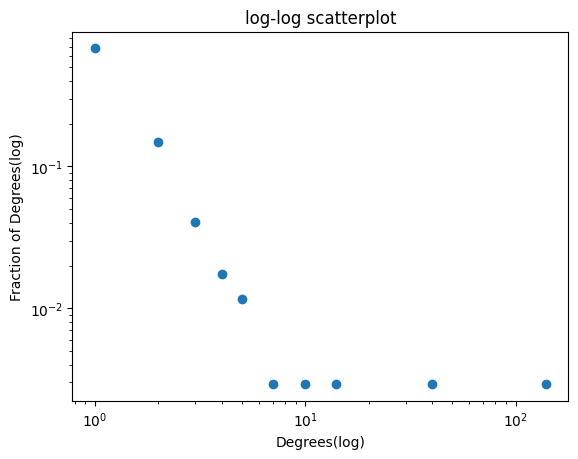

In [15]:
plt.scatter(degrees, frac)
plt.xlabel('Degrees(log)')
plt.xscale('log')
plt.ylabel('Fraction of Degrees(log)')
plt.yscale('log')
plt.title('log-log scatterplot')
plt.show()

Yes, it suggests a pattern following a power law. As the degree increases, the probability of its occurrence decreases, resulting in a smaller proportion.

(d) For the highest-weighted edge, list the tweets (up to 25) for that edge and describe the
interaction between these two users which explains why this edge has the highest weight.


In [16]:
edges = AOGraph.edges(data = True)
edgesDf = pd.DataFrame(edges, columns=['node 1', 'node 2','numberMentions'])
edgesDf = pd.concat([edgesDf.drop(['numberMentions'], axis=1), edgesDf['numberMentions'].apply(pd.Series)], axis=1)
edgesDf.sort_values('numberMentions', ascending=False).head()

,node 1,node 2,numberMentions
14,djokernole,AustralianOpen,6
21,djokernole,bahraichse,3
86,djokernole,IhtimaniSelma,2
245,,sa9321,2
190,ravindrapraut,suhassatwadhar,2


In [17]:
AO_tag.loc[AO_tag['user'] == 'AustralianOpen'].head(25).values 

array([['2021-02-21 14:05', 'AustralianOpen',
        "He'll give you the <U+0001F45F> off his <U+0001F9B6>\r\n\r\nThat's @DjokerNole <U+0001F97A>\r\n\r\n#AusOpen | #AO2021 https://t.co/6tD3b1pIpZ",
        list(['djokernole'])],
       ['2021-02-21 13:54', 'AustralianOpen',
        "It's all about the Slams <U+0001F3C6>\r\n\r\n#AusOpen | #AO2021 | @DjokerNole https://t.co/ZjZjNpTe4p",
        list(['djokernole'])],
       ['2021-02-21 13:43', 'AustralianOpen',
        'Fallin for Melbourne...\r\n\r\nOver and over again <U+0001F604>\r\n\r\n#AusOpen | #AO2021 https://t.co/4fftRTzlhT',
        list([])],
       ['2021-02-21 13:18', 'AustralianOpen',
        '"@rogerfederer and @RafaelNadal inspire me...I think as long as they go, I\'ll go." - @DjokerNole <U+0001F64C><U+0001F4AA>\r\n\r\n#AusOpen |… https://t.co/FfFpZvjPNw',
        list(['rogerfederer', 'rafaelnadal', 'djokernole'])],
       ['2021-02-21 13:06', 'AustralianOpen',
        'The <U+0001D66A><U+0001D663><U+0001D659><U+0001D65

The result shows that the edge between user @djokernole and @AustralianOpen has the tightest weight of 6 mentions. It's because @djokernole is the champion of Australia Open in 2021 which totaly make sense.

(e) Provide a visualization of the mention graph in which the edges visually (e.g., color, weight,
etc.) reflects its weight (i.e., the number of mentions).

In [18]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [19]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [20]:
edgeWidth = AOGraph['djokernole']['AustralianOpen'] ['numberMentions']
edgeWidth

6

In [21]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(graph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth/6)) #maxmention is 6 from question 2d
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgeColor]))
        scatters.append(s)

    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Closeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [22]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [23]:
addRandomPositions(AOGraph)

In [24]:
configure_plotly_browser_state()
plotNetworkSizeColor(AOGraph)

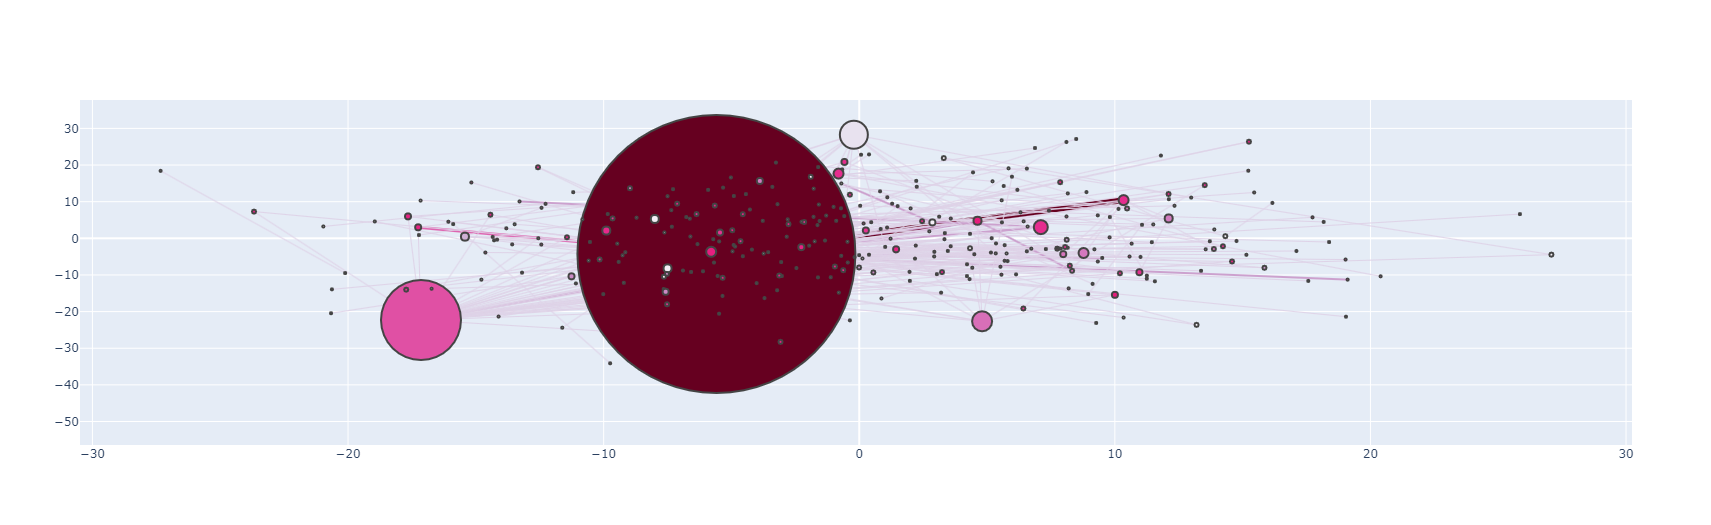

In [52]:
from IPython.display import Image
Image(filename='/content/1eplot.png')

#Q2. Content Analysis

(a) Analyze the most frequent non-stopwords in all the tweets with the chosen hash-tag, and
provide a basic description of the main themes.

In [25]:
# Store the stopwords in Stop_words
Stop_words = set(stopwords.words('english'))
# In addition to common stop words, we would add several filters
Stop_words.add('https') 
Stop_words.add('0001f3c6')
Stop_words.add('fe0f')
Stop_words.add('0001f44f')
Stop_words.add('0001f3be')
Stop_words.add('<u+0001f3c6>')

# The follwoing function is modifed fro 
def corpus_count_words(Tweets):
  word_counter = Counter()
  for tweet in Tweets:
    # Modified from SNA lab coding - finding most coomon has tags
    Words_total = [word.strip(""" ,.:-'\";""").lower() for word in tweet.split() 
    if len(word) >3
    if not word.startswith("www.")
    if not word.startswith("#")
    if not word.startswith("@")
    if not word.startswith("http")]

    Words_cleaned = [word for word in Words_total if not word in Stop_words]
    word_counter.update(Words_cleaned)
  
  return word_counter

In [26]:
top20hashtag = pd.DataFrame(corpus_count_words(AO_tag['tweet'].values).most_common(20), columns=["Word", "Count"])
top20hashtag

,Word,Count
0,djokovic,110
1,novak,92
2,grand,57
3,title,56
4,congratulations,49
5,slam,45
6,melbourne,42
7,open,39
8,medvedev,37
9,australian,36


As shown above, the theme is to congrat Novak Djokovic winning the Australia open 2021, other player like Medvedev is also mentioned.

(b) In a visualization of the mention graph add hover information for the nodes which lists the 3
most common words for each user. Indicate the nodes that have no words visually. For those
nodes that have words, are the words similar for connected users or are the words different?
If not the same, do the words have similar themes?

In [27]:
def User_Top3_Words(df, TaggedUsers):
    user_Common_Words = dict()
    for TaggedUser in TaggedUsers:
      # Select top 3 words for each #travel tagged user
      Topk_Words = corpus_count_words(df[df['user']==TaggedUser]['tweet'].values).most_common(3)
      Count = len(df[df['user']==TaggedUser]['tweet']) # count the numebr of tweets for this taged user
      words = dict()
      words = {word:count for (word,count) in Topk_Words} # store top k words and counts to dict
      user_Common_Words[TaggedUser] = {'Number of Tweets':Count, 'words':words} # store user, top k wors and counts to dict
    return user_Common_Words

In [28]:
def getTopKuser(df, k, username):
    stop = set(stopwords.words('english'))
    counter = Counter()

    for tweet in df.loc[df['user']== username]['tweet']:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2 and word.isalpha()])
    topk = counter.most_common(k)
    return topk

In [29]:
userTopK = User_Top3_Words(AO_tag,AOGraph.nodes())

In [30]:
def Text_on_graph (name):
  topWords = ''
  Tweets_Counts = userTopK[name]['Number of Tweets']
  userTopWords = userTopK[name]['words']

  for word,count in userTopWords.items():
    topWords += '{0}: {1} '.format(word,count)
  return "Username: {0}; Number of tweets: {1}; Top 3 Words: [{2}]".format(name,Tweets_Counts,topWords)

In [31]:
def plotNetworkSizeColor(graph):
    #closenessCentr = nx.closeness_centrality(graph)
    #maxCentr = max(closenessCentr.values())
    #minCentr = min(closenessCentr.values())
    cells = 300
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth/6)) #maxmention is 6 from question 2d
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color = purd300[edgeColor]))
        scatters.append(s)

    for node in graph.nodes():
        #nodeCentr = closenessCentr[node]
        #nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        
        xPos, yPos = graph.nodes[node]['pos']
        top3 = getTopKuser(AO_tag, 3, node)
        
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text=Text_on_graph(node),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                  color = ("Purple" if top3 == [] else "Green"),
                  size=nx.degree(graph,node)*2,         
                  line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [32]:
# Plot network with top words (k=3), where size is number of tweets
configure_plotly_browser_state()
plotNetworkSizeColor(AOGraph)

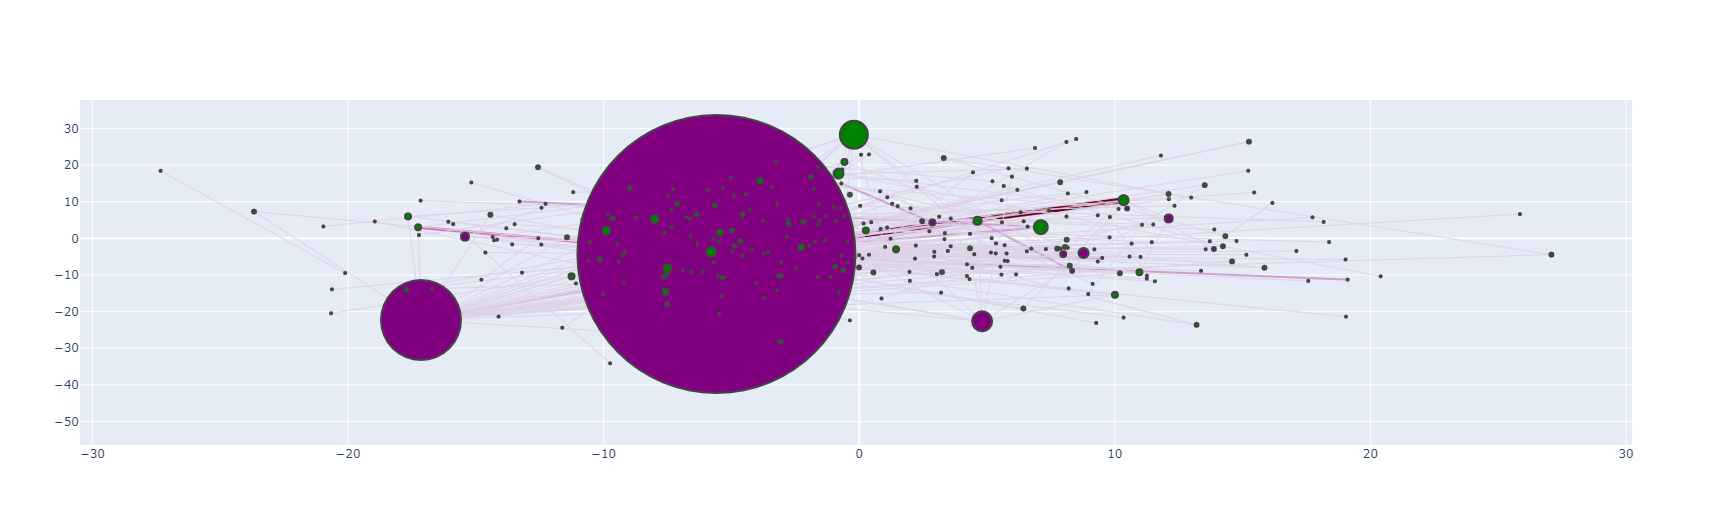

In [54]:
Image(filename='/content/2bplot.png')

The nodes with top 3 mentioned are maked in purple, other nodes are marked as green.Top 3 mentioned (djokovic, rafael nadal, naomiosaka) have no words, 3 of them are all players so they did not tweet during game.

# Q3. Centrality Analysis

(a) Using PageRank and a 2nd centrality measure of your choosing, calculate the centrality of the
nodes on your graph based on each of the measures. Provide a mention graph visualization
for each measure that demonstrates the centrality value of each node using a visual property
(size, color, etc) for each of the centrality measures.

In [33]:
pageRank = nx.pagerank(AOGraph)

In [34]:
closeness_centrality = nx.closeness_centrality(AOGraph)

In [35]:
def plotNetworkSizeColor(graph,central):
  scatters=[]
  maxVal = max(central.values())
  minVal = min(central.values())

  for (node1, node2) in graph.edges():
      x0, y0 = graph.nodes[node1]['pos']
      x1, y1 = graph.nodes[node2]['pos']
      edgeWidth = graph[node1][node2]['numberMentions']
      edgeColor = int(299*(edgeWidth/6)) #maxmention is 6 from question 2d

      s = Scatter(
              x=[x0, x1],
              y=[y0, y1],
              mode='lines', 
              line=scatter.Line(width=edgeWidth ,color = purd300[edgeColor]))
      scatters.append(s)

  for node in graph.nodes():
      xPos, yPos = graph.nodes[node]['pos']
      nodeCenter = central[node]
      nodeColor = int(299*(nodeCenter-minVal)/(maxVal-minVal))
      s = Scatter(
              x=[xPos], 
              y=[yPos], 
              text="User: %s <br> centrality: %.3f" % (node, nodeCenter),
              hoverinfo='text',
              mode='markers', 
              marker=dict(
                  color=purd300[nodeColor], 
                  size=nx.degree(graph,node)*2,         
                  line=dict(width=2)))
      scatters.append(s)
  
  layout = Layout(showlegend=False)
  fig = Figure(data=scatters, layout=layout)
  iplot(fig, show_link=False)

In [36]:
configure_plotly_browser_state()
plotNetworkSizeColor(AOGraph,pageRank)

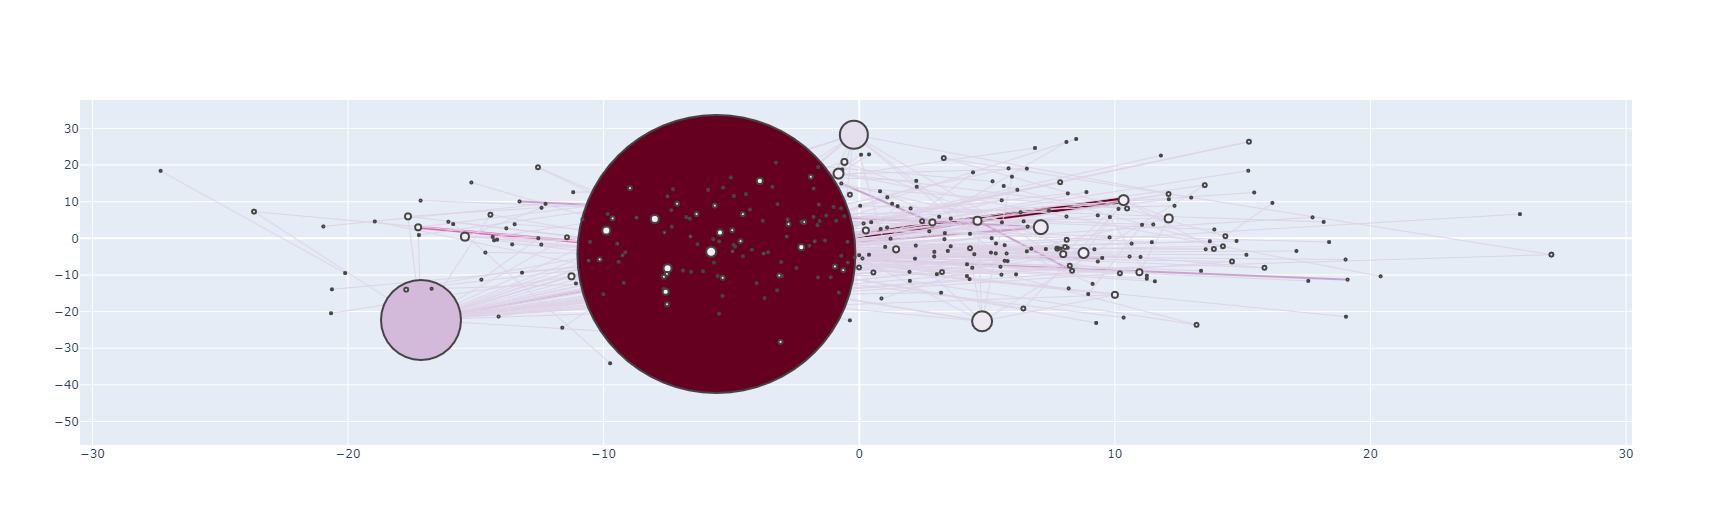

In [57]:
Image(filename='/content/3cplotpagerank.png')

In [37]:
configure_plotly_browser_state()
plotNetworkSizeColor(AOGraph,closeness_centrality)

(b) List the 5 most central nodes for each of the centrality measures. Discuss the following:
1. Are the results between centrality measures similar or different? Explain a reason for
the observed similarity or difference.
2. What centrality measure is more useful for your network? Why?

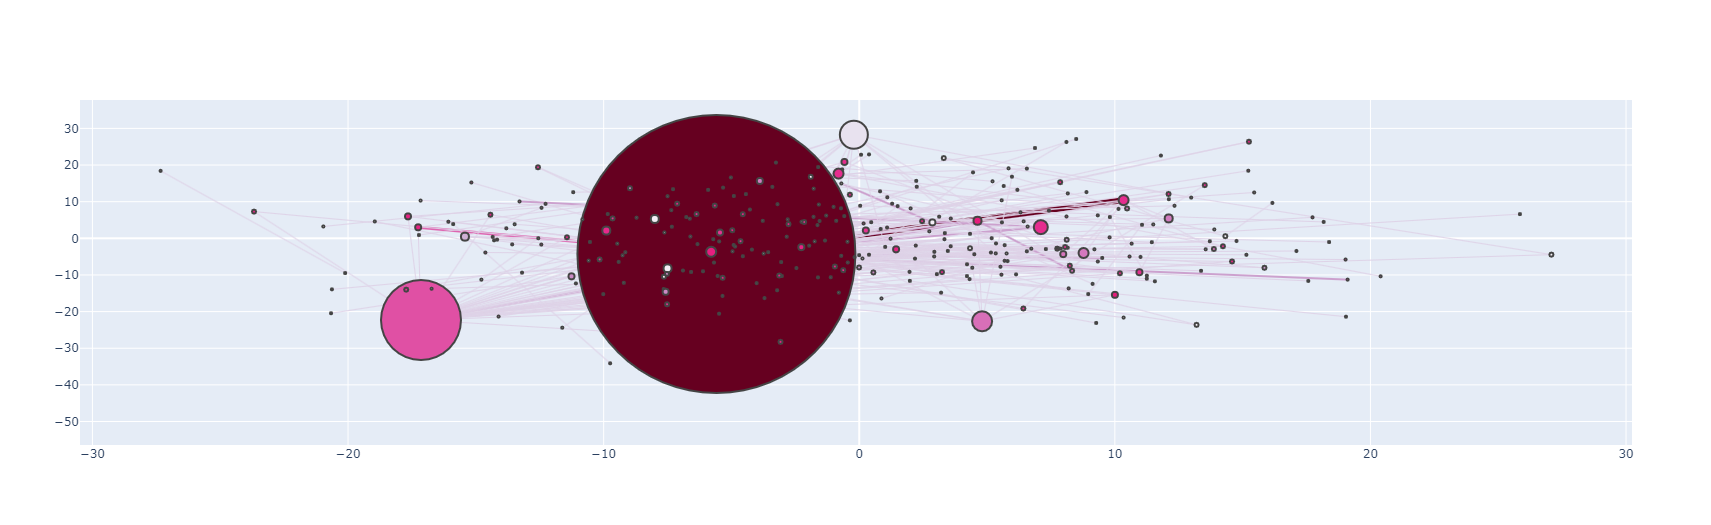

In [55]:
Image(filename='/content/3cplotcloseness.png')

In [38]:
#pageRank
sorted_d = sorted(pageRank.items(), key=operator.itemgetter(1),reverse = True)
sorted_d[:5]

[('djokernole', 0.16745365405458984),
 ('australianopen', 0.04264505164498344),
 ('ValleyHeightsAU', 0.022199133311133303),
 ('daniilmedwed', 0.011758041761398299),
 ('ravindrapraut', 0.010345636942151485)]

In [39]:
#closeness_centrality
sorted_d2 = sorted(closeness_centrality.items(), key=operator.itemgetter(1),reverse = True)
sorted_d2[:5]

[('djokernole', 0.42320222070916047),
 ('toisports', 0.28121280461066217),
 ('be_acheampong', 0.2799927924431539),
 ('saaj6666', 0.27639545463874504),
 ('bahraichse', 0.2740481471683523)]

In [40]:
AO_tag.loc[(AO_tag['user'] == 'australianopen' )]

,date,user,tweet,mentioned


In [41]:
AO_tag.loc[AO_tag['tweet'].str.lower().str.contains("@australianopen") ]

,date,user,tweet,mentioned
3,2021-02-21 14:24,DjokovicUk,@DjokerNole @AustralianOpen So happy Nole........,"[djokernole, australianopen]"
9,2021-02-21 14:23,FB_Freestyle,@RajeevRam @AustralianOpen @BKrejcikova Great ...,"[rajeevram, australianopen, bkrejcikova]"
31,2021-02-21 14:18,DerekBradPhotos,"@AustralianOpen Moral of the #AusOpen was, Alw...",[australianopen]
40,2021-02-21 14:16,ImArvisam,@AustralianOpen @DjokerNole Please release the...,"[australianopen, djokernole]"
46,2021-02-21 14:14,Serving_It_Up,Your 2021 @AustralianOpen men’s singles winner...,"[australianopen, djokernole]"
116,2021-02-21 13:56,AdamWiener,"“Tactically, physically and mentally it was a ...","[australianopen, djokernole…]"
122,2021-02-21 13:55,champagnepogi,Shameful performance by Medvedev. That -120 l...,"[djokernole, australianopen]"
141,2021-02-21 13:50,DjokerNole1022,#AO2021 champion.\r\n@DjokerNole !<U+0001F3BE>...,"[djokernole, australianopen]"
144,2021-02-21 13:49,bahraichse,@AustralianOpen @DjokerNole Incredible perform...,"[australianopen, djokernole]"
149,2021-02-21 13:48,manishkoridr,@DjokerNole @AustralianOpen None of the next g...,"[djokernole, australianopen]"


In [42]:
AO_tag.loc[(AO_tag['user'] == 'toisports' )]

,date,user,tweet,mentioned
72,2021-02-21 14:05,toisports,#AusOpen #AO2021 \r\n\r\nBig Three are 'cybor...,[daniilmedwed]
140,2021-02-21 13:50,toisports,#AusOpen #AO2021 #NovakDjokovic \r\n\r\nFrom ...,[djokernole's]
216,2021-02-21 13:30,toisports,#AusOpen #AO2021 #NovakDjokovic\r\n\r\n@Djoker...,"[djokernole, australianopen]"
696,2021-02-21 12:16,toisports,#AusOpen #AO2021 #NovakDjokovic \r\n\r\n@Djo...,[djokernole]
995,2021-02-21 11:52,toisports,#AusOpen #AO2021 #NovakDjokovic\r\n\r\nOn clou...,"[djokernole's, australianopen]"


In [43]:
AO_tag.loc[AO_tag['tweet'].str.lower().str.contains("@toisports") ]

,date,user,tweet,mentioned


Both pagerank and closeness_centrality has the same top 1 centrality of djokernole. The pagerank centrality is better in terms of mentioned by other users, since more meaningful content are displayed. The closeness centrality is better in terms of users, where the user post more content, but probably not mention by other users. 

#Q4. Sentiment Analysis

(a) Using NRCLex, evaluate each tweet and determine the number of words in each dimension of
emotion. Construct a chart showing the number of words in each emotion. Which emotion
is most frequent in the data? Does that make sense in the context of your chosen hash-tag?
Explain why or why not by providing example tweets to support your claims

In [44]:
emo_dict = {}
for index, tweet_data in AO_tag.iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)

  relative_numbers = text_object.affect_frequencies
  absolute_numbers = text_object.raw_emotion_scores
  for key in absolute_numbers:
    if key not in emo_dict:
      emo_dict[key] = absolute_numbers[key]
    else:
      emo_dict[key] += absolute_numbers[key]  

In [45]:
emo_dict

{'positive': 318,
 'trust': 208,
 'anticipation': 199,
 'joy': 131,
 'anger': 64,
 'negative': 133,
 'fear': 80,
 'surprise': 85,
 'disgust': 41,
 'sadness': 59}

Text(0, 0.5, 'Count')

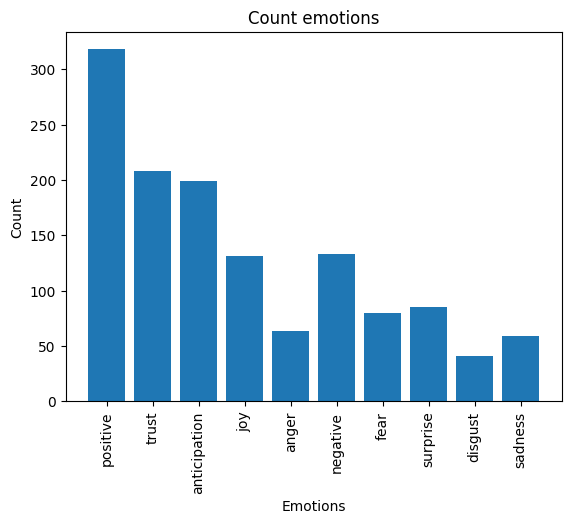

In [46]:
plt.bar(list(emo_dict.keys()),emo_dict.values())
plt.title('Count emotions')
plt.xlabel('Emotions')
plt.xticks(rotation=90)
plt.ylabel('Count')

According to the barchart, positive is the most frequent emotions. It makes sense since the tag #AusOpen as one of the major grand slam of tennis is supposed to show positivity.

(b) For each user, determine which fraction of a user’s total identified words are in each emotional
affect (i.e., normalize the counts for each user). Identify the users with the highest fraction of
words in each emotion. Note: You may wish to set a minimum number of tweets for user’s
to be considered.

In [47]:
# Group the tweets by user
grouped = AO_tag.groupby('user')

# Calculate the emotional affect scores for each user
emo_scores = {}
for user, group in grouped:
    total_words = 0
    scores = {'positive': 0, 'trust': 0, 'anticipation': 0,'joy': 0, 'anger': 0, 'negative': 0, 'fear': 0, 'surprise': 0, 'disgust': 0, 'sadness': 0}
    for tweet in group['tweet']:
        text_object = NRCLex(tweet)
        relative_numbers = text_object.affect_frequencies
        for key in scores:
            if key in relative_numbers:
                scores[key] += relative_numbers[key]
            else:
                scores[key] += 0 # assume the value is zero if the key does not exist
        total_words += len(text_object.words)  
    if total_words > 10: # set a minimum number of words for the user to be considered
        emo_scores[user] = scores

In [48]:
# Normalize the emotional affect scores for each user
normalized_scores = {}
for user in emo_scores:
    scores = emo_scores[user]
    total_words = sum(scores.values())
    if total_words > 0: # make sure total_words is greater than zero before normalizing
      normalized_scores[user] = {key: scores[key] / total_words for key in scores}

In [49]:
# Print the users with the highest fraction of words in each emotion
for emo in normalized_scores.keys():
    sorted_users = sorted(normalized_scores, key=lambda x: normalized_scores[x].get(emo, 0), reverse=True) # use .get() to get the value for the emotion if it exists, or return 0 if it doesn't
    for user in sorted_users[:5]:
        if emo in normalized_scores[user]:
            print(f"{user}: {normalized_scores[user][emo]}")

In [50]:
for emo in normalized_scores[user].keys():
    print(f"Top users for emotion {emo}:")
    sorted_users = sorted(normalized_scores, key=lambda x: normalized_scores[x].get(emo, 0), reverse=True) # use .get() to get the value for the emotion if it exists, or return 0 if it doesn't
    for user in sorted_users[:5]:
        if emo in normalized_scores[user]:
            print(f"{user}: {normalized_scores[user][emo]}")
    print()

Top users for emotion positive:
Arif45652765: 1.0
BBCSport: 1.0
Elena84933613: 1.0
GBtennis: 1.0
Jappie_1965: 1.0

Top users for emotion trust:
ElleB101: 1.0
MissLizzieZiZi: 1.0
karanamin: 1.0
saroj292: 1.0
Abhimania45: 0.5

Top users for emotion anticipation:
BallyOz66: 1.0
Everything2T: 1.0
IncrediblyBozza: 1.0
TheMrnass: 1.0
_rrajat_: 1.0

Top users for emotion joy:
GetIntoEnglish: 0.5
Imsourabhsuman: 0.5
MatthewJHarris7: 0.5
Gwenzitto: 0.3333333333333333
MosesGershon: 0.3333333333333333

Top users for emotion anger:
Michael40070887: 0.5
SusyAyu72: 0.5
1stupidmunkey: 0.3333333333333333
AzizTariqazi: 0.3333333333333333
_zacharygates: 0.3333333333333333

Top users for emotion negative:
Ammarzaheer: 1.0
BennyGStreams: 1.0
BilalSaeedlive: 1.0
JamieMuscatel: 1.0
MossyGene: 1.0

Top users for emotion fear:
MoKhalil25: 1.0
DLooby1977: 0.5
WillyBWilliams3: 0.5
AzizTariqazi: 0.3333333333333333
KeepUpWithMuzi: 0.3333333333333333

Top users for emotion surprise:
LiuchengzhaoCHN: 1.0
bello778: 

(c) Construct a plot(s) to answer the following: Is there a correlation between any dimension of
emotion and one of the centrality measures you evaluated? If you see a trend, please provide
a hypothesis for why; if you do not see a trend, provide a hypothesis for why centrality of a
user has no observed correlation with emotion in your particular dataset.

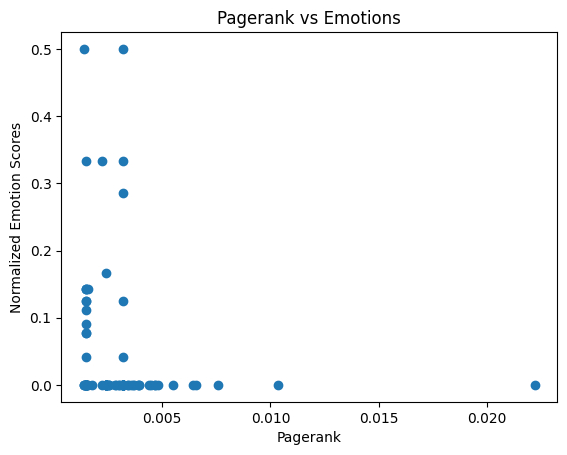

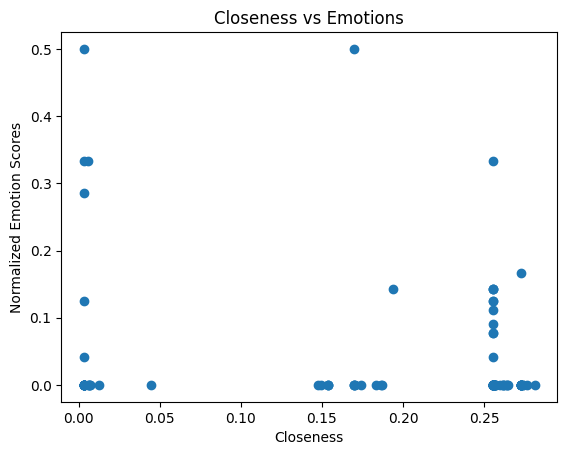

In [51]:
pagerank_dict = nx.pagerank(AOGraph)
closeness_dict = nx.closeness_centrality(AOGraph)

centrality_dict = {'pagerank': pagerank_dict, 'closeness': closeness_dict}

# Define the centrality measures to evaluate
centrality_measures = ["pagerank", "closeness", "degree"]

# Create a scatter plot for each measure
for measure in centrality_measures:
    # Check if the measure is in the centrality dictionary
    if measure in centrality_dict:
        common_users = set(centrality_dict[measure].keys()).intersection(normalized_scores.keys())
        x = [centrality_dict[measure][user] for user in common_users]
        y = [normalized_scores[user][emo] for user in common_users]
        plt.scatter(x, y)
        plt.title(f"{measure.capitalize()} vs Emotions")
        plt.xlabel(measure.capitalize())
        plt.ylabel("Normalized Emotion Scores")
        plt.show()

There is no obvious trend.One hypothesis for why centrality of a user has no observed correlation with emotion in this particular dataset could be that the emotions expressed in the text data are not strongly tied to the social network interactions of the users. It is possible that the users' emotions are more strongly influenced by other factors, such as their personal experiences or relationships, rather than their social network centrality